In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np
import os
import sys
sys.path.append('../')
import gp

Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
import glob, os
import mahotas as mh
c_gold = []
c_rhoana = []
for z in range(250,300):
    path = '/home/d/data/cylinderNEW/'
    gold = sorted(glob.glob(os.path.join(path, 'gold', '*'+str(z)+'.png')))
    rhoana = sorted(glob.glob(os.path.join(path, 'rhoana', '*'+str(z)+'.png')))
    mask = sorted(glob.glob(os.path.join(path, 'mask', '*'+str(z)+'.png')))   
    mask = mh.imread(mask[0]).astype(np.bool)
    gold = mh.imread(gold[0])
    rhoana = mh.imread(rhoana[0])
    

    #convert ids from rgb to single channel
    rhoana_single = np.zeros((rhoana.shape[0], rhoana.shape[1]), dtype=np.uint64)
    rhoana_single[:, :] = rhoana[:,:,0]*256*256 + rhoana[:,:,1]*256 + rhoana[:,:,2]
    gold_single = np.zeros((gold.shape[0], gold.shape[1]), dtype=np.uint64)
    gold_single[:, :] = gold[:,:,0]*256*256 + gold[:,:,1]*256 + gold[:,:,2]

    # relabel the segmentations
    gold_single = gp.Util.relabel(gold_single)
    rhoana_single = gp.Util.relabel(rhoana_single)
    
    
    #mask the rhoana output
    rhoana_single[mask==0] = 0
    
    c_gold.append(gold_single)
    c_rhoana.append(rhoana_single)
    
    

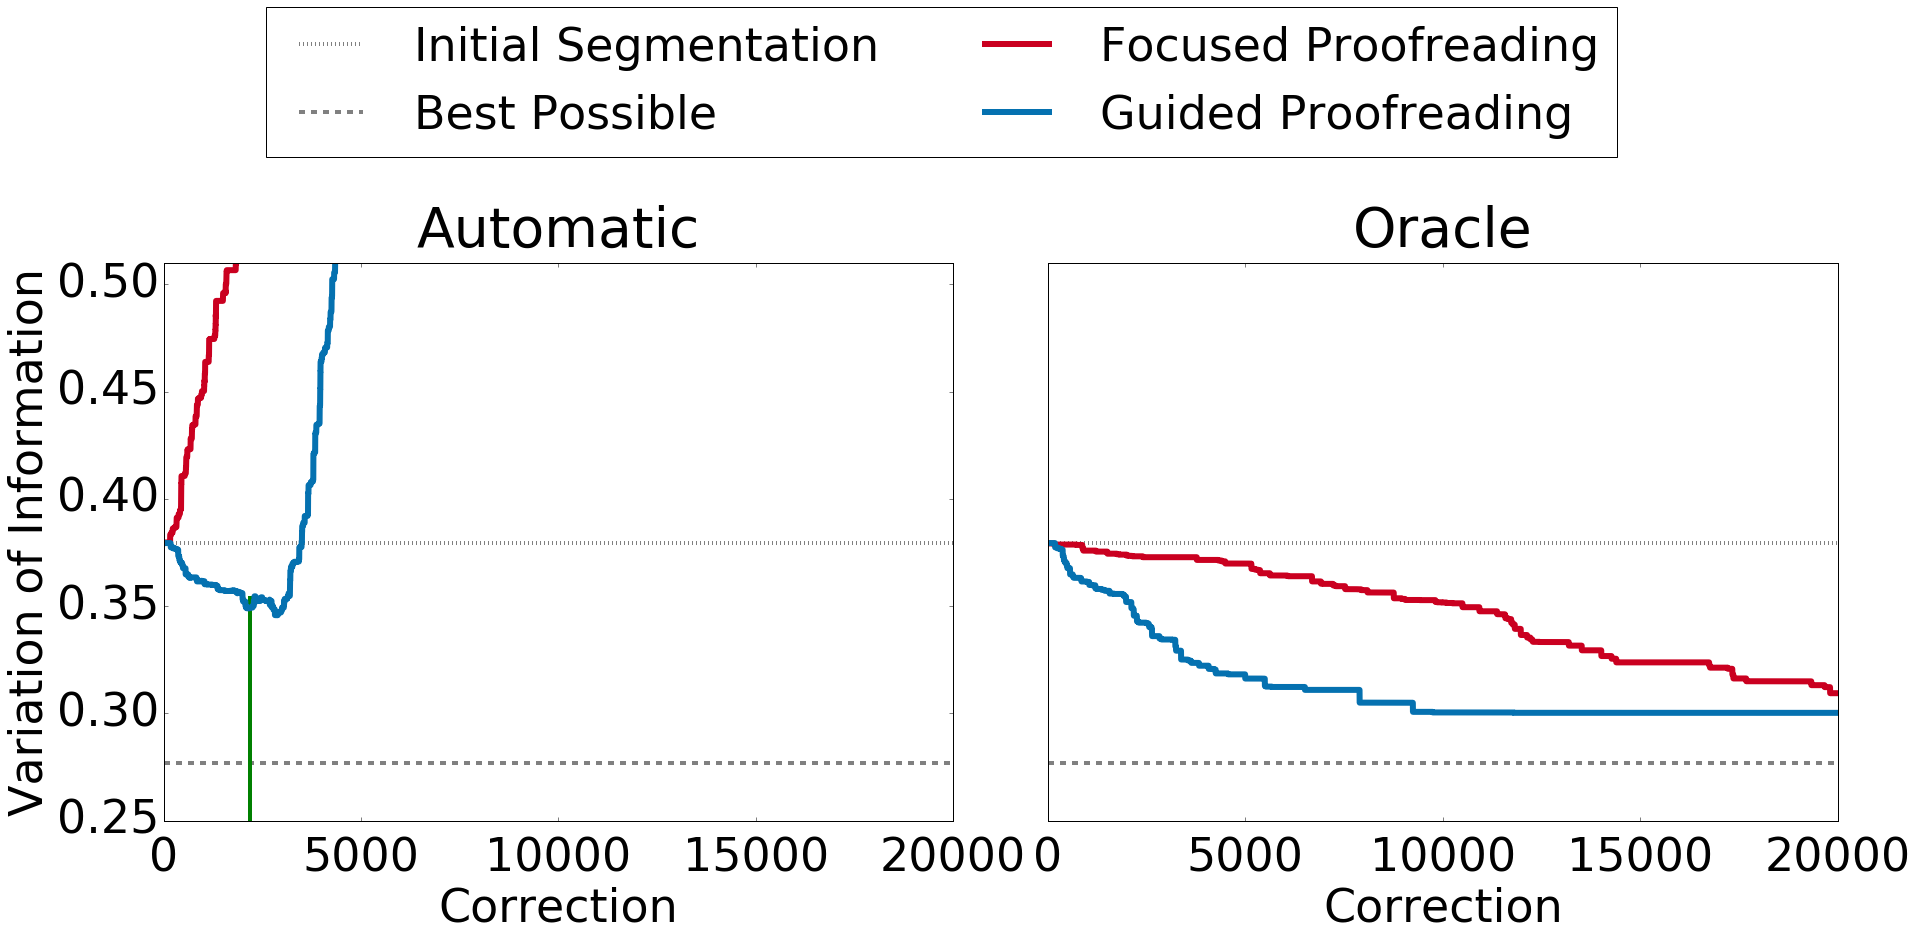

In [8]:
import matplotlib.gridspec as gridspec
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height
fig = plt.figure(1, figsize=(30,10))

gs = gridspec.GridSpec(1,2,width_ratios=[1,1])
gs.update(wspace=0.12, hspace=0.05)

BEST95 = 2199
DATA = 'cyl'
clamper=20000

plt.subplot(gs[0])
a,b,c,d = gp.Stats.analyze_users2(['auto95FP_NEW'], ['auto00GP_NEW'], c_gold, c_rhoana, returnplt=True, vilabel=True, 
                        hideYlabels=False, showlegend=False,hideXlabels=False,clabel=True,hline=BEST95,
                        DATADIR='/home/d/CYLINDERSTUDY/',clampX=clamper,data=DATA)
plt.title('Automatic', y=1.02)
plt.subplot(gs[1])
plt.title('Oracle', y=1.02)
a,b,c,d = gp.Stats.analyze_users2(['simuserFP_NEW'], ['simuserGP_NEW'], c_gold, c_rhoana, returnplt=True, vilabel=False, 
                        hideYlabels=True, showlegend=True,bestlabel=True, hideXlabels=False,clabel=True,
                        DATADIR='/home/d/CYLINDERSTUDY/',clampX=clamper,data=DATA)

# fig.legend()

plt.savefig('/home/d/PAPERGFX/'+DATA+'_trails.pdf', bbox_inches='tight')
